# Project Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. 

There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


# -- Input features-

1.	W,2.	R,3.	AB,4.	H,5.	2B,6.	3B, 7.	HR,8.	BB,9.	SO,10.	SB,11.	RA,12.	ER,13.	ERA ,14.	CG,15.	SHO,

  16.	SV ,17.	E 

-- Output: Number of predicted wins (W)

Importing require library 

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')

In [4]:
#printing no.of rows and columns
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 30
No of Columns: 17


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Observation:
    
W is the target
and other 16 features contain statistics summary which are input features nput features in this dataset are : Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
#we need to rename the columns for clear understanding of input featues
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

Observation

The Dataset will come under regression analysis as there is no categorical data

# Statistical Analysis

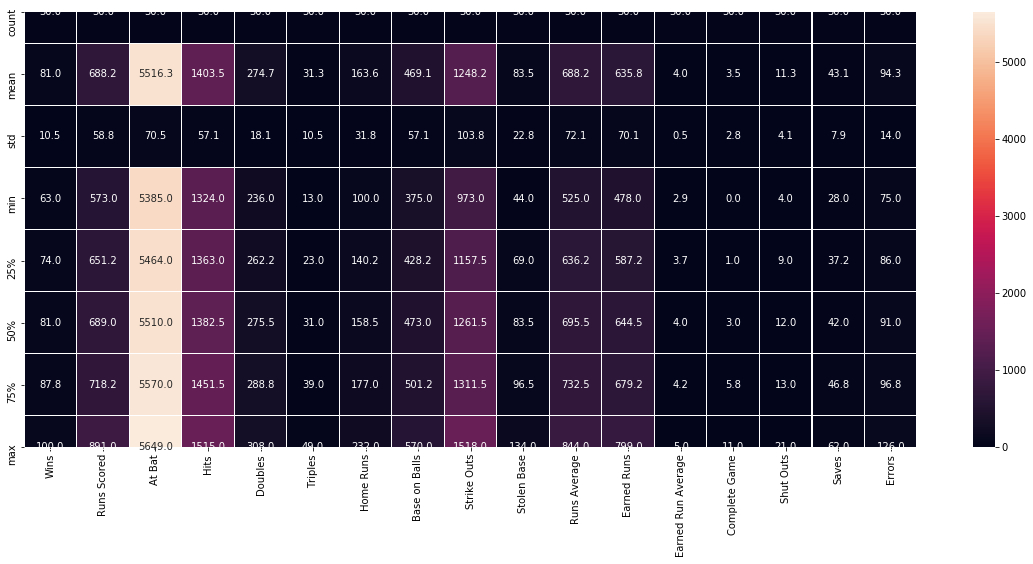

In [10]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


Comment -

* If we just look at mean and 50% columns for different feature we can see data is sightly right skew for most of features.
  Count is same for each variable.
* 75% and max values for Errors, Shutout, Run Scored shows presence of possible outliers.
* Overall all statstical parameter from mean to max, indicate features are seem to be progressing in a definite manner showing   no visible abnormalities.
* Heatmap clearly shows data need to scale while building ML Model.

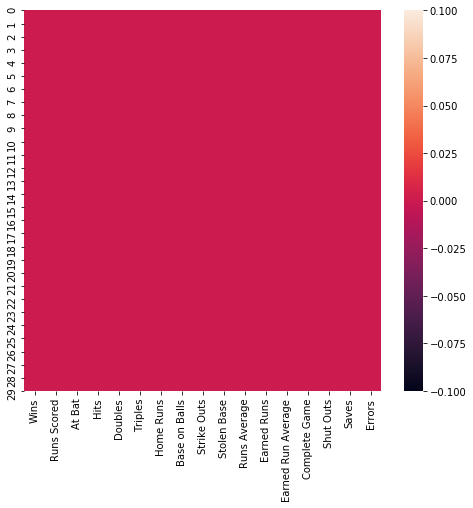

In [13]:
#Missing value check
plt.figure(figsize=(8,7))
sns.heatmap(df.isnull())

In [14]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                    Missing Values  % Missing data
Wins                             0             0.0
Stolen Base                      0             0.0
Saves                            0             0.0
Shut Outs                        0             0.0
Complete Game                    0             0.0
Earned Run Average               0             0.0
Earned Runs                      0             0.0
Runs Average                     0             0.0
Strike Outs                      0             0.0
Runs Scored                      0             0.0
Base on Balls                    0             0.0
Home Runs                        0             0.0
Triples                          0             0.0
Doubles                          0             0.0
Hits                             0             0.0
At Bat                           0             0.0
Errors                           0             0.0


Observation

-There is no null value present in dataset.

# EDA

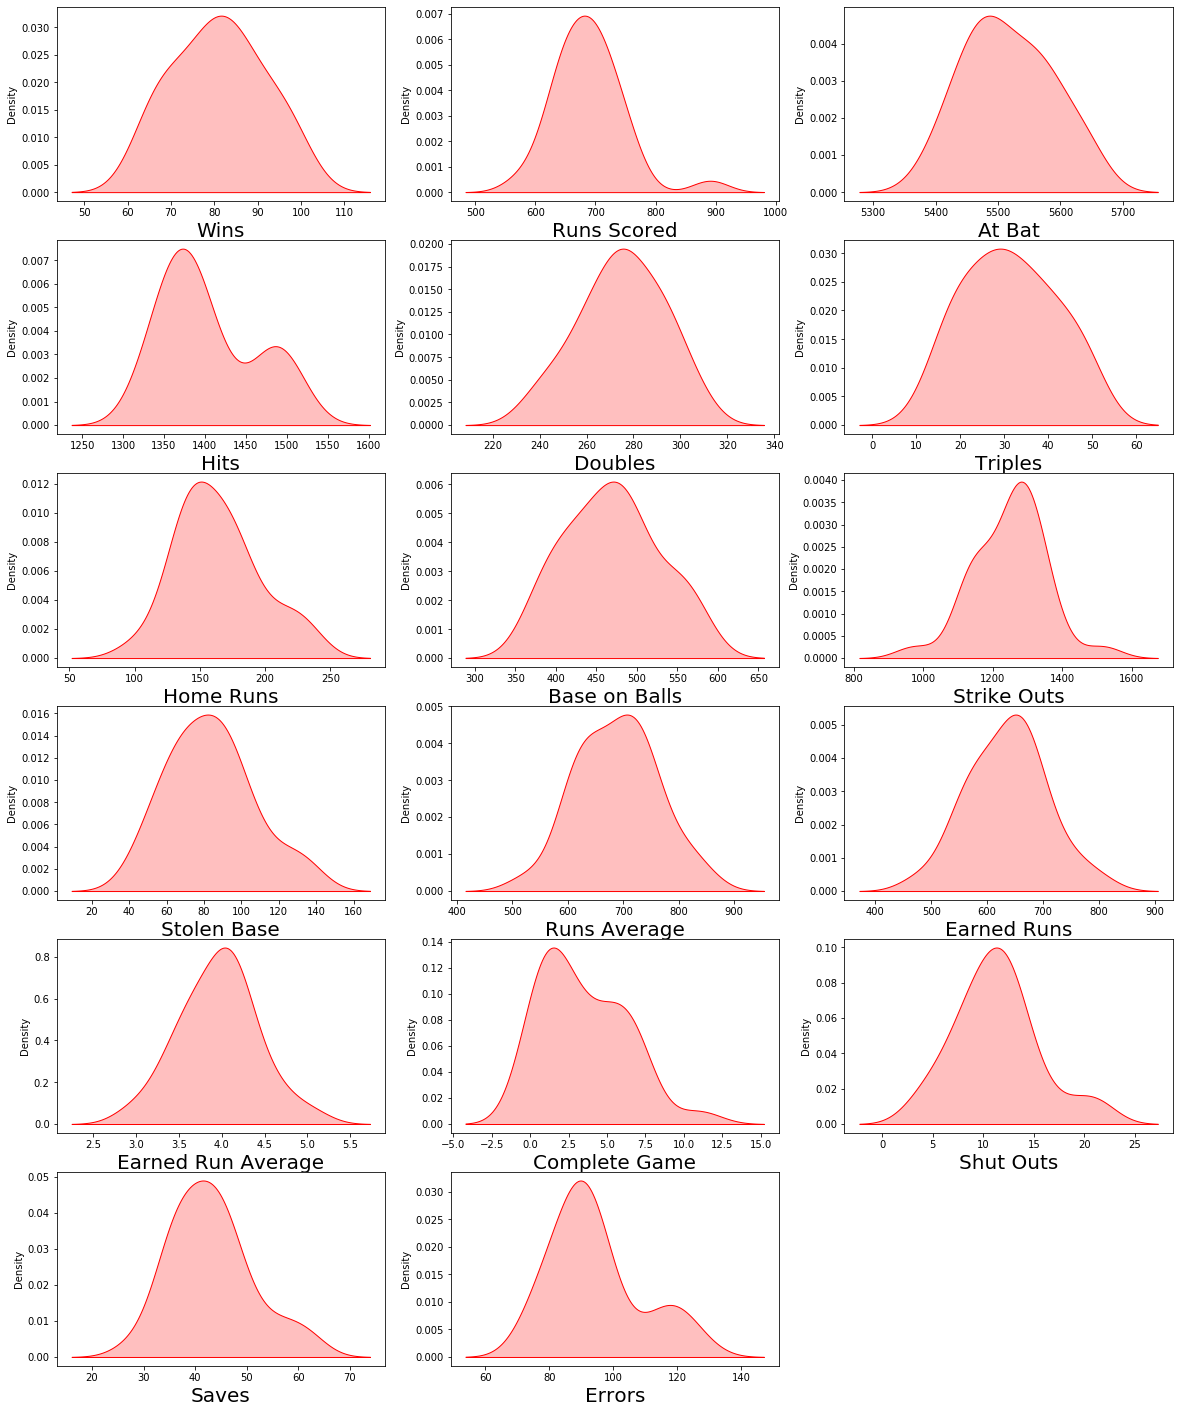

In [15]:
# We will find out which features contribute to win
# Distribution of features
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Observation

some of feature are either left or right skewed.

we will put insight on how many hits convert into Runs and inturn lead to win throgh multivariate analysis

Text(0, 0.5, 'Hits')

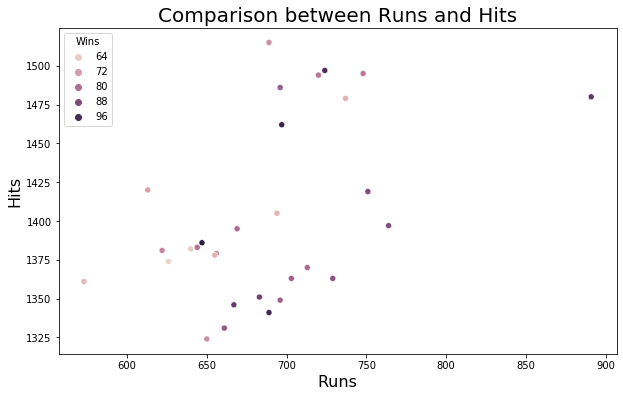

In [17]:


# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Hits',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Hits'],hue=df['Wins'])
plt.xlabel('Runs',fontsize =16)
plt.ylabel("Hits",fontsize =16)

Observation:
    
* Even if number of times ball hit bat is less than 1375 still run in range of 650 to 750 contribute to win.
* Very less wining chance for run less than 650 and no of hits less than 1325.
* There is one outlier in runs. After checking sknewness we can decide whether to keep to while building ML model or 
remove it even if it is valid data point. Definitely it will affect performance of ML model if we consider outlier data points as most of data point will not fall dont in that side.
potential leading to biased model.

Text(0, 0.5, 'Home Runs')

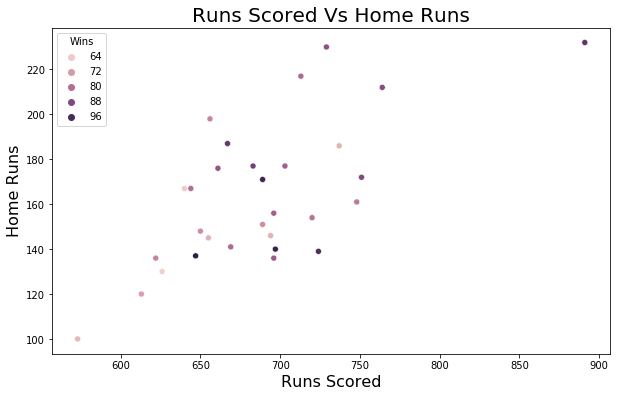

In [19]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Home Runs',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Home Runs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Home Runs',fontsize =16)

Observation:
    
    
Home Runs in range of 140 & 180 with combination of Run Scored in between 650-750 lead to more than 90 Wins for team. So keeping home runs in this range is cruical for more possibility of wins.
But still its game, anything is possible with good performance of single winning player. We can see from scatter plot some of the datapoints have homeruns above 200, but still in wins are around 80.

conclusion

we can say that Home runs is definitely contributing factor for team to win but not sufficient to make sure win.

Text(0, 0.5, 'At Bat')

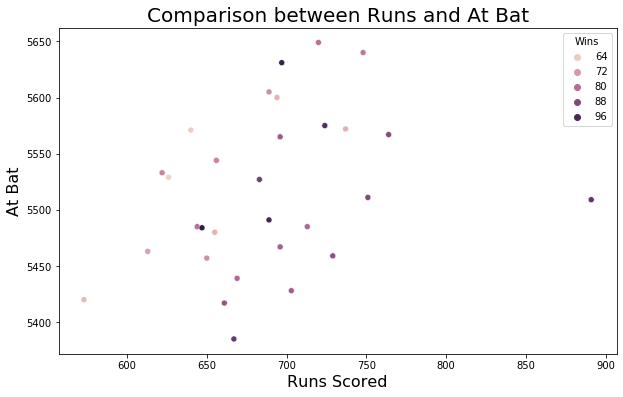

In [20]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and At Bat', fontsize =20)
sns.scatterplot(df['Runs Scored'],df['At Bat'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel("At Bat",fontsize =16)

Observation :
    
* We doesnot get any benchmark range for at bats from here. 

* So it is questionable things that how much At bats matter to winning statstics. Atleast we get here that At Bat and Run Scored has positive linear relationship, which means that more Run Scroed naturally lead to more at bats.

Text(0, 0.5, 'Strike Outs')

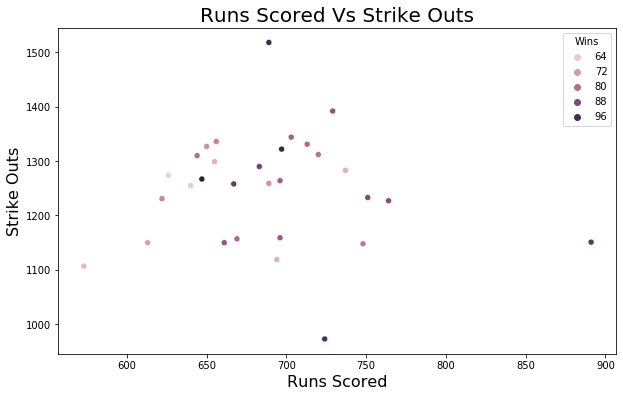

In [22]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Strike Outs',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Strike Outs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Strike Outs',fontsize =16)

Observation :
    
    
In simple word strike Outs means batter is out. We can see Strike out opponent team below 700 runs essential for more win.
Clearly Strikeout below 1200 is like making recipe for losing game. Strikeouts in regular interval not only lead to pressure on opponent in game but also bring break on high run score.

Text(0, 0.5, 'Earned Run Average')

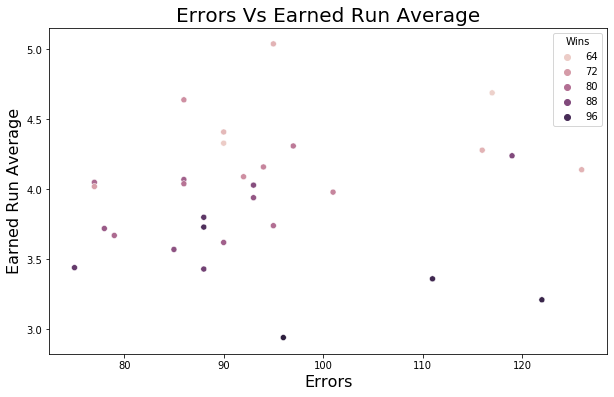

In [24]:
# Checking the relation between two variables
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('Errors Vs Earned Run Average',fontsize =20)
sns.scatterplot(df['Errors'],df['Earned Run Average'],hue=df['Wins'], cmap=('Spectral'))
plt.xlabel('Errors',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

Observation-

Same result about ERA we got here as we get in Violin Plot.
Keeping ERA below 3.5 or as much as low by Pitcher means sure win. By keeping low ERA pitcher saves run for his team.
Another things we can see in above scatter plot is that Minimum error means maximum wins. Keeping Errors below number 90 can be held as benchmark.

Text(0, 0.5, 'Earned Run Average')

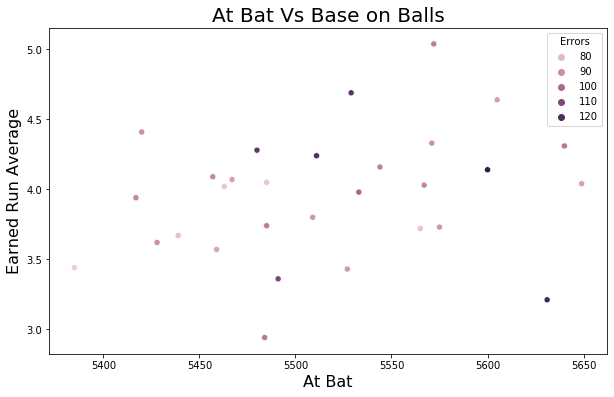

In [27]:
# Checking the relation between two variables
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('At Bat Vs Base on Balls',fontsize =20)
sns.scatterplot(df['At Bat'],df['Earned Run Average'],hue=df['Errors'], cmap=('Spectral'))
plt.xlabel('At Bat',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

Comment :
    
At Bat Vs Base on Balls doesnot give any significant imformation than High ERA means High Errors.

# Boxplot of Features

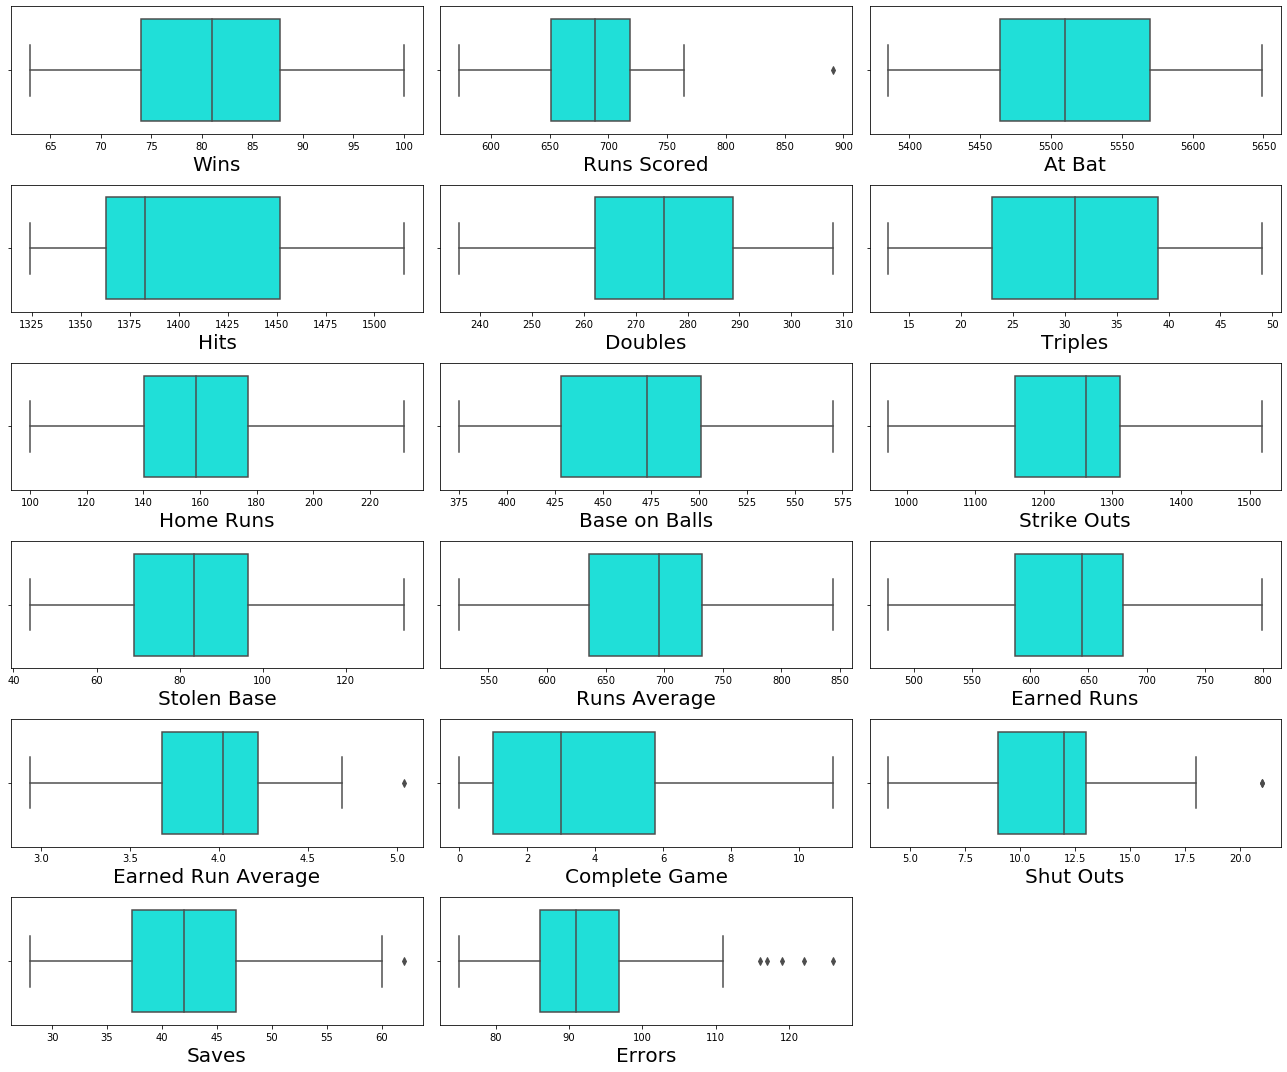

In [28]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Observation :

* There are some outliers present in data. But as data is of Real world MLB 2014, these outliers are valid datapoints.

* Shutouts are rare but completely possible with exceptional performance.

* Run scored has one outliers but as Run is one of the most important parameter, it will be wise to remove corresponding datpoint.

* Outliers in Errors are totally possible so now need to worry about it.

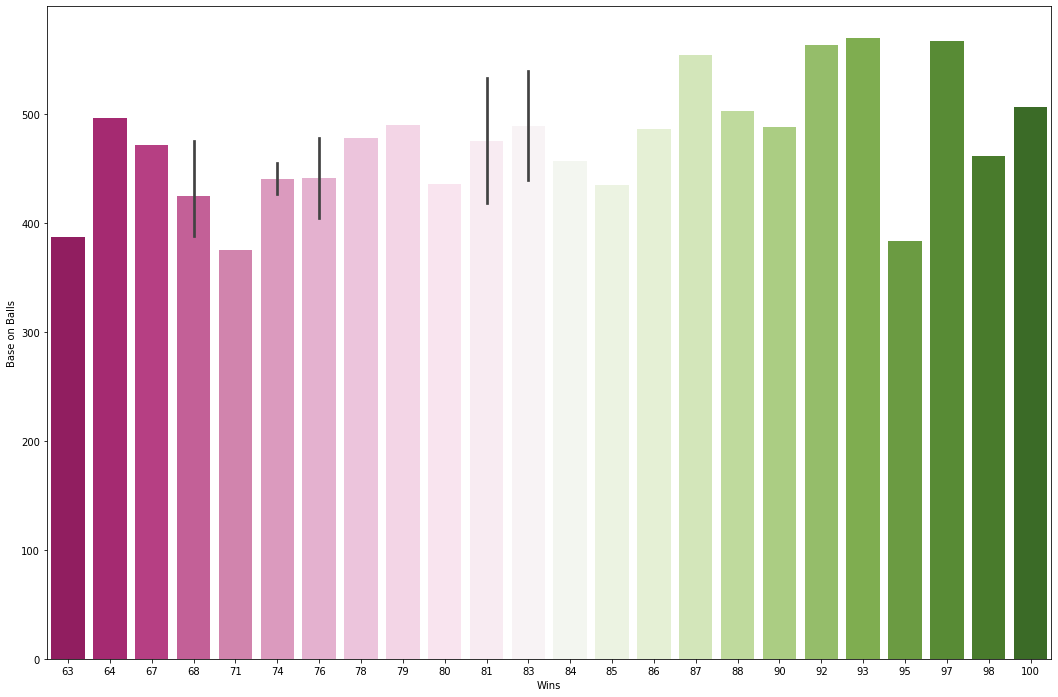

In [30]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Base on Balls", data=df,palette='PiYG')
plt.show()

# Comment :

* Base on ball is contribution from pitcher to batter for winning. In simple word it is like Wide or No Ball in Cricket.
* We can see that base on ball above 400 really contribute in Wins in team.

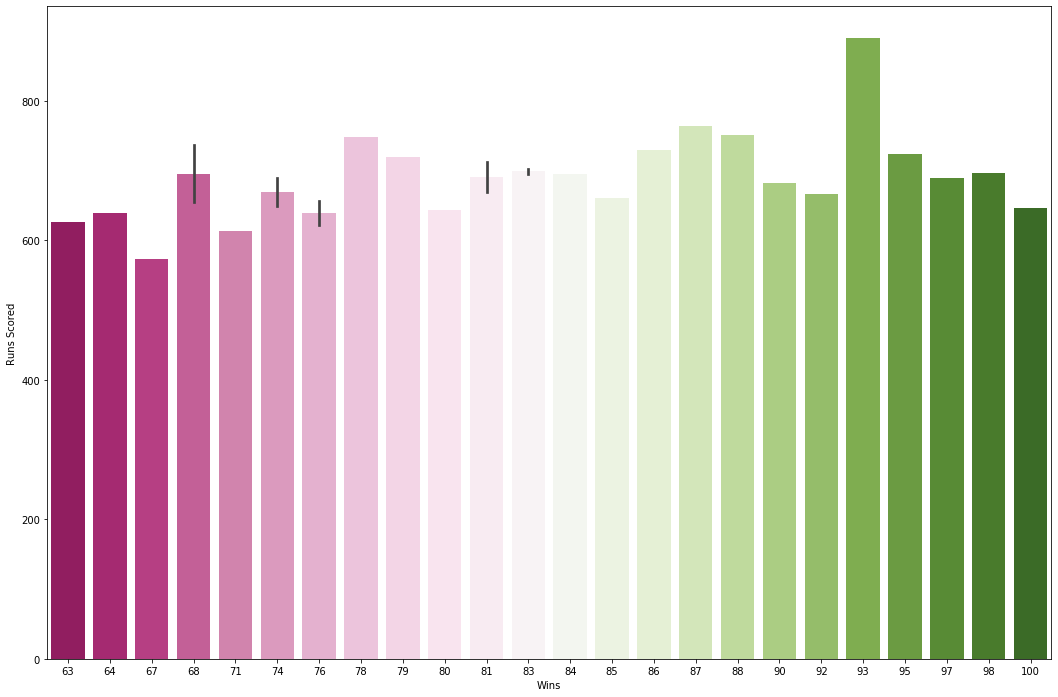

In [31]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Scored", data=df,palette='PiYG')
plt.show()

# Observation:
    
* Run Scored above 600 is benchmark for wining in any scenerio

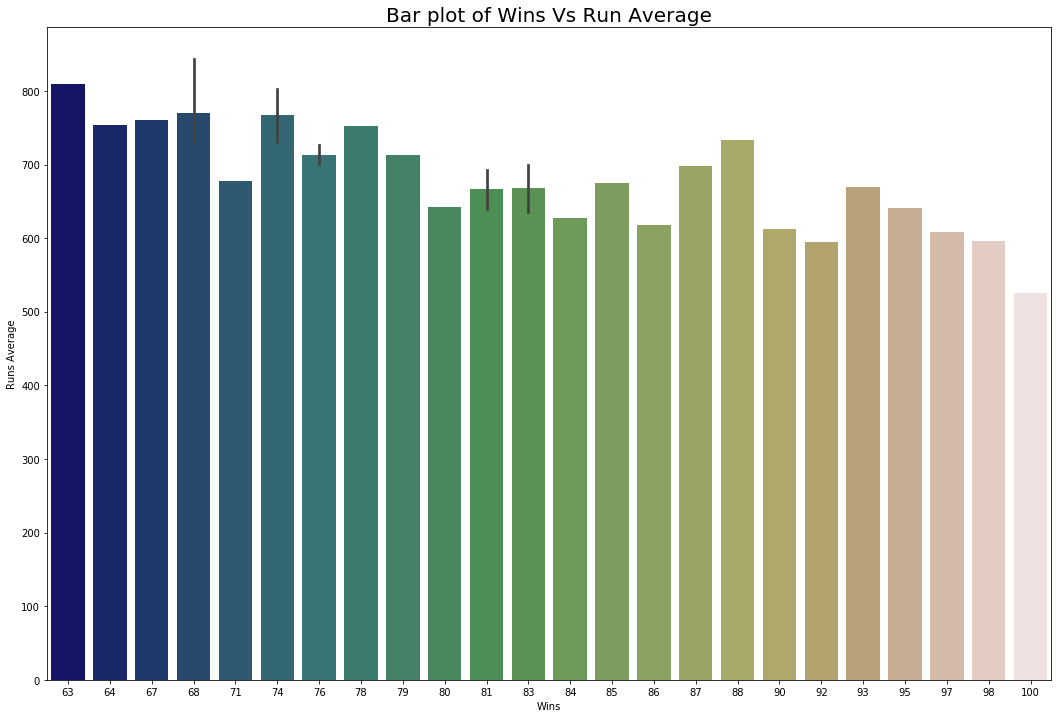

In [32]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Average", data=df,palette='gist_earth')
plt.title('Bar plot of Wins Vs Run Average', fontsize =20)
plt.show()

Observation :
    
* Here comes interesting plot, we can see Run Average decrease with increase in number of wins. But why this trend if more runs means directly increase in chance of winning.

* More Run Average gives advantage to hitter and here as wins are high even at low run this clearly means that perforamance of pitcher is better than hitter i.e. pitcher is knocking out hitter at low run score. This must be reflected in any pitcher side stastical parameter like Strike outs, Earned Run or Earned Run Average.

There is one outlier in Runs score, lets check that entry

In [34]:
df['Runs Scored'].max()

891

In [35]:
df.loc[df['Runs Scored']==891]

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


* It seem like highest Doubles, Homeruns and base ball also belong to this entry. Let cross check

In [37]:
df['Home Runs'].max(),df['Base on Balls'].max(),df['Doubles'].max()

(232, 570, 308)

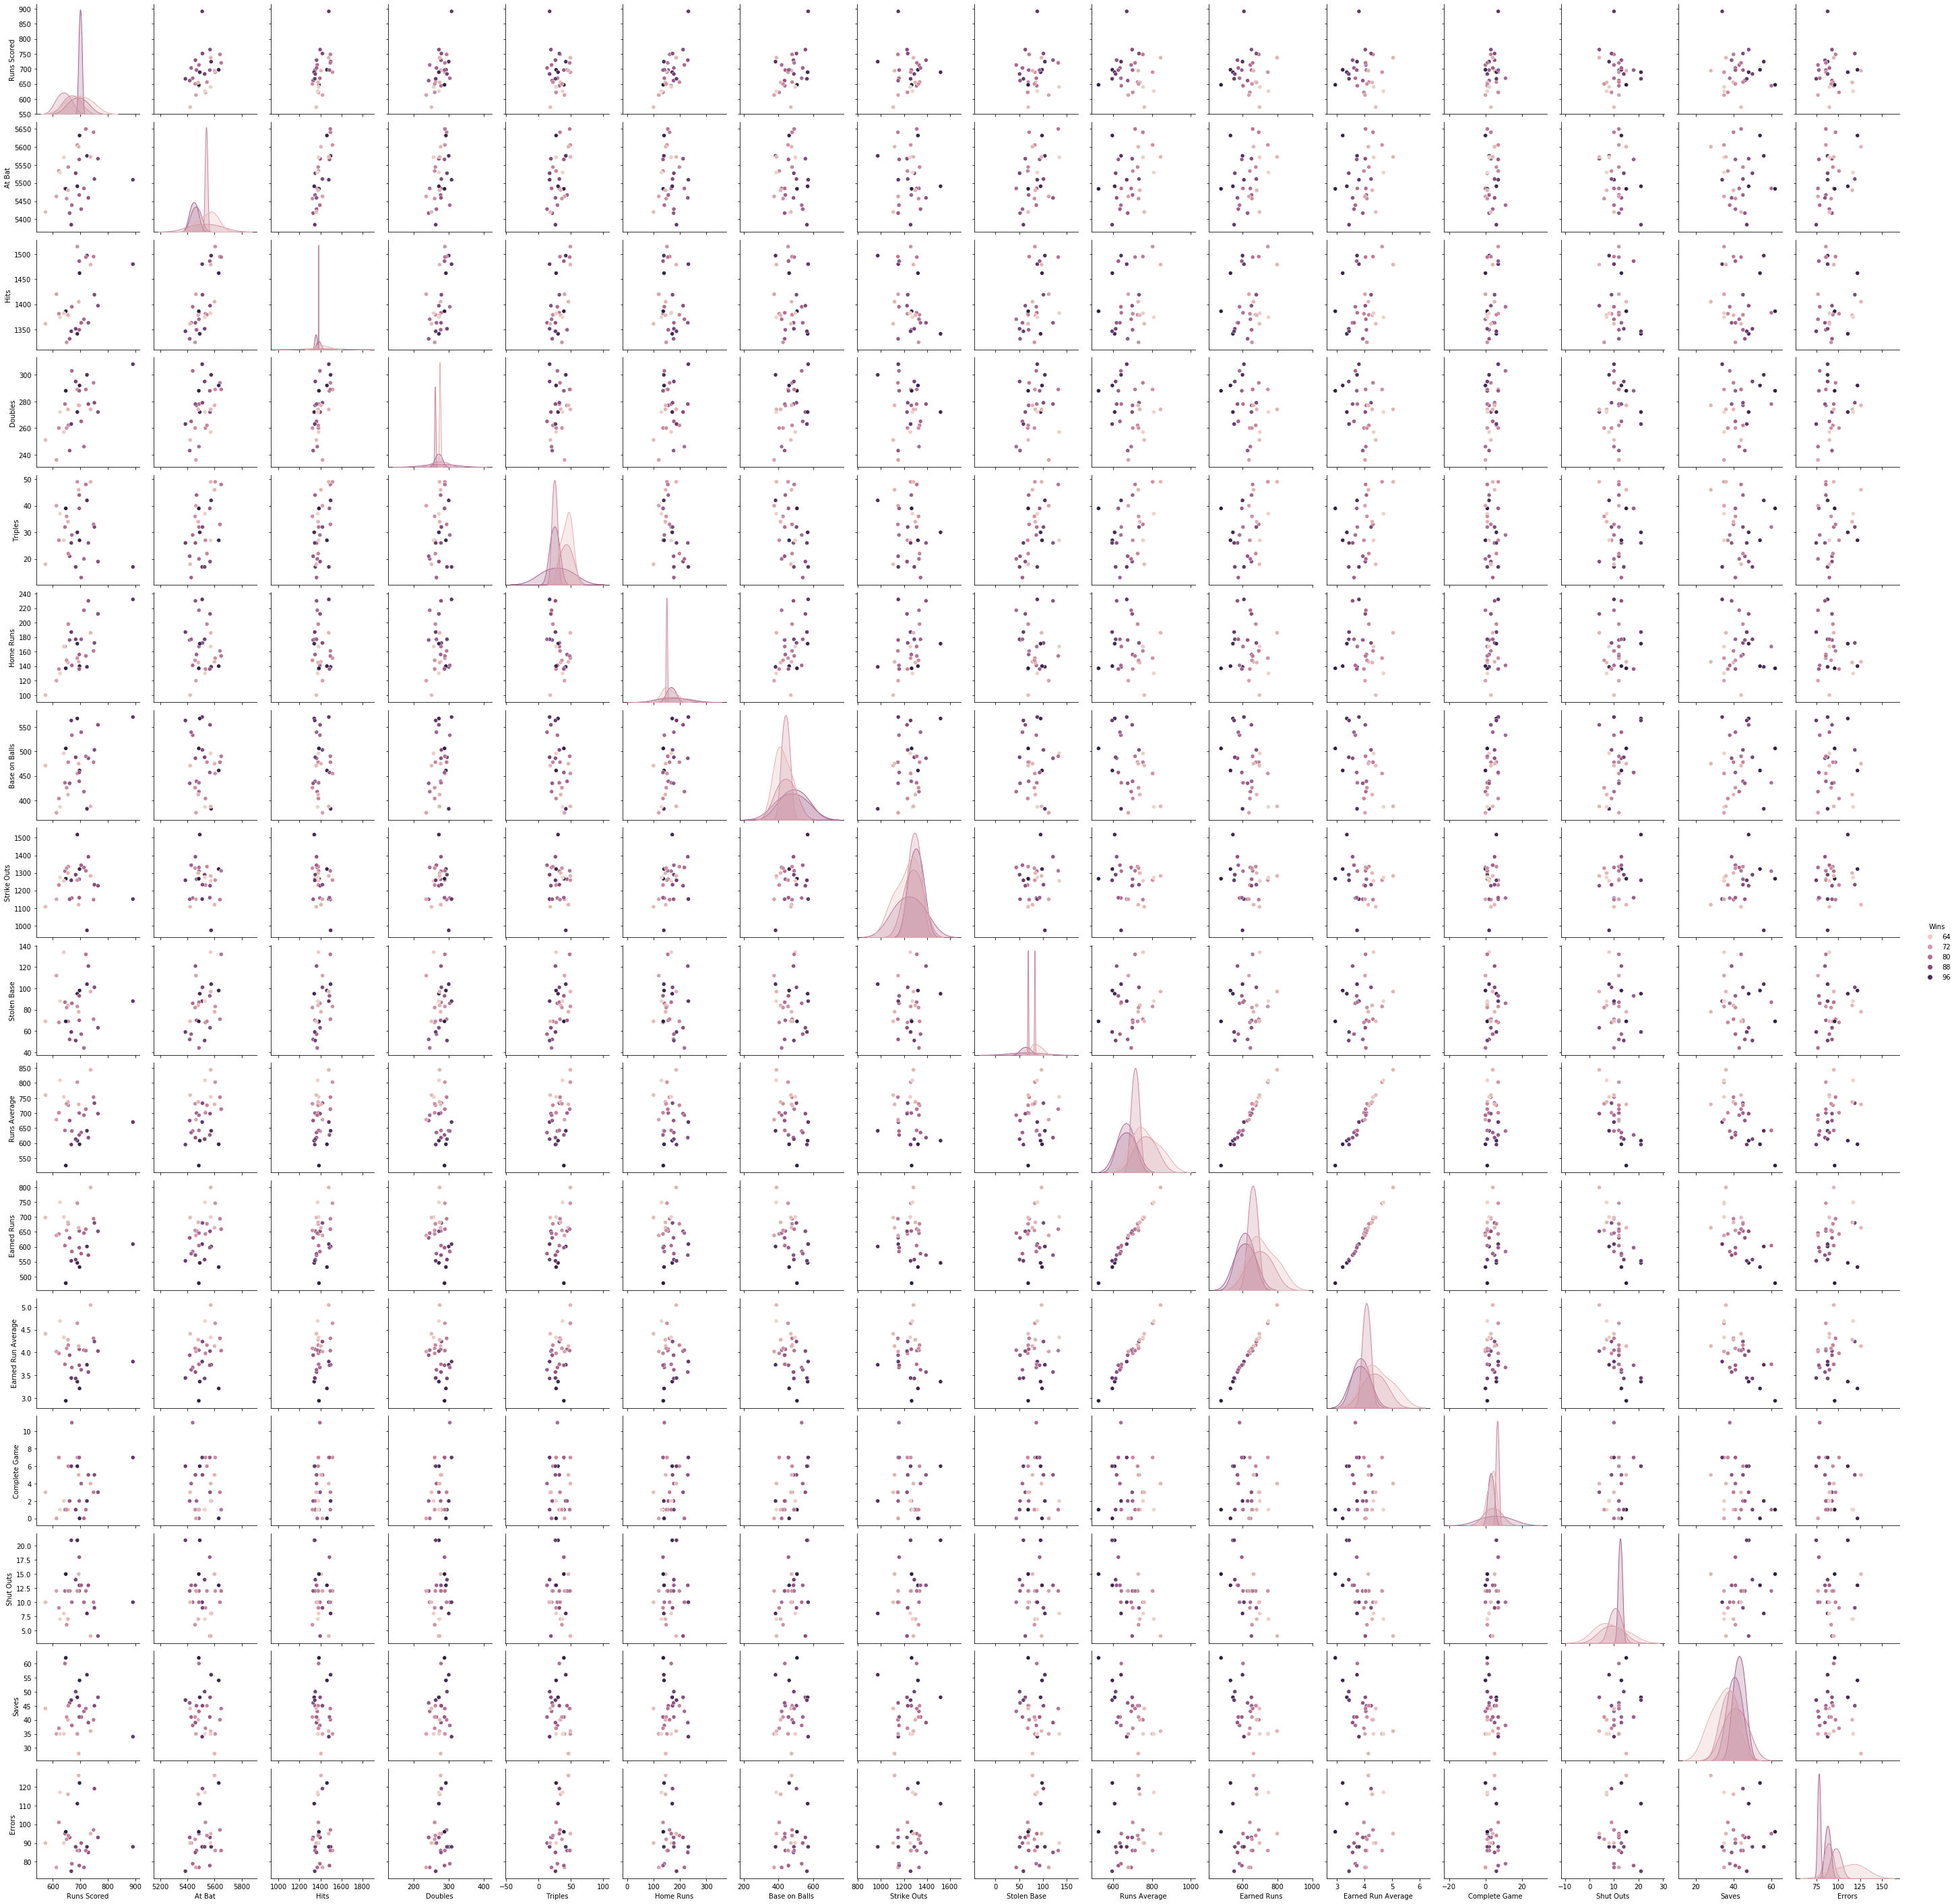

In [40]:
sns.pairplot(df, hue="Wins")

In [42]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

NameError: name 'upper_triangle' is not defined

<Figure size 1224x864 with 0 Axes>

# Outliers Detection and Removal

In [43]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [44]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df1.shape)

Shape of dataset after removing outliers : (29, 17)


In [45]:
# Data Loss
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((30-29)/30)*100,'%')

Percentage Data Loss : 3.3333333333333335 %


# Feature selection and Engineering
# 1. Skewness of features

In [46]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

Observation-

* Optimal range for skewness is -0.5 to 0.5.

* Hits, Complete Game, Shuts Outs, Saves, Errors are positively Skewed in nature, need to transform.

# Transforming positive or right skew data using boxcox  transformation

In [48]:
from scipy.stats import boxcox


In [49]:
df1['Hits']=boxcox(df1['Hits'],-2)


In [50]:
df1['Shut Outs']=boxcox(df1['Shut Outs'],0.5)


In [51]:
df1['Saves']=boxcox(df1['Saves'],0.5)

Observation

* Other feature not able transform by Boxcox Method as they showing data must be positive. 
So others columns are transfrom using yeo-johnson method

In [53]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [54]:
EC=['Errors','Complete Game']
ds =df1[EC].copy()

In [55]:
column_trans =ColumnTransformer(
    [  ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors']),
      ('Complete Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete Game'])])
transformed_yeojohnson =column_trans.fit_transform(df1)   
new_cols=['Errors','Complete Game']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

,Errors,Complete Game
0,-0.348265,-0.307098
1,-0.540820,-0.307098
2,-1.326125,2.011315
3,0.650818,1.264463
4,-0.540820,1.264463


In [56]:
# reseting index and mergeing transform data
df1.reset_index(drop=True, inplace=True)
dataset.index=df1.index
df1[EC]=dataset[EC]

In [57]:
# Skewness after transforming features
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs            -0.085802
Saves                 0.370280
Errors                0.065585
dtype: float64

All features skewness is now transform within permissible limit of -0.5 to 0.5 as shown above

# 2. Corrleation

In [58]:

df1.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.025885,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.477949,0.754886,-0.079633
Runs Scored,0.390451,1.000000,0.438022,0.429083,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.119300,0.071589,0.039865
At Bat,-0.085780,0.438022,1.000000,0.771485,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.193987,-0.127766,0.332002
Hits,-0.025885,0.429083,0.771485,1.000000,0.525668,0.574467,-0.219890,-0.220426,-0.375825,0.424369,0.241583,0.278600,0.254635,0.070020,-0.134500,-0.093443,-0.012712
Doubles,0.384886,0.469293,0.490752,0.525668,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088345,0.258675,0.152541
Triples,-0.206737,0.134204,0.445604,0.574467,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.067667,-0.236230,0.080498
Home Runs,0.245697,0.586894,-0.064653,-0.219890,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.030256,0.084263,-0.165883
Base on Balls,0.447513,0.258450,-0.137850,-0.220426,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.434799,0.197177,-0.056106
Strike Outs,0.156469,0.081158,-0.111243,-0.375825,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.200067,0.105667,0.164817
Stolen Base,-0.169503,0.075323,0.373674,0.424369,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.098740,-0.187605,0.070527


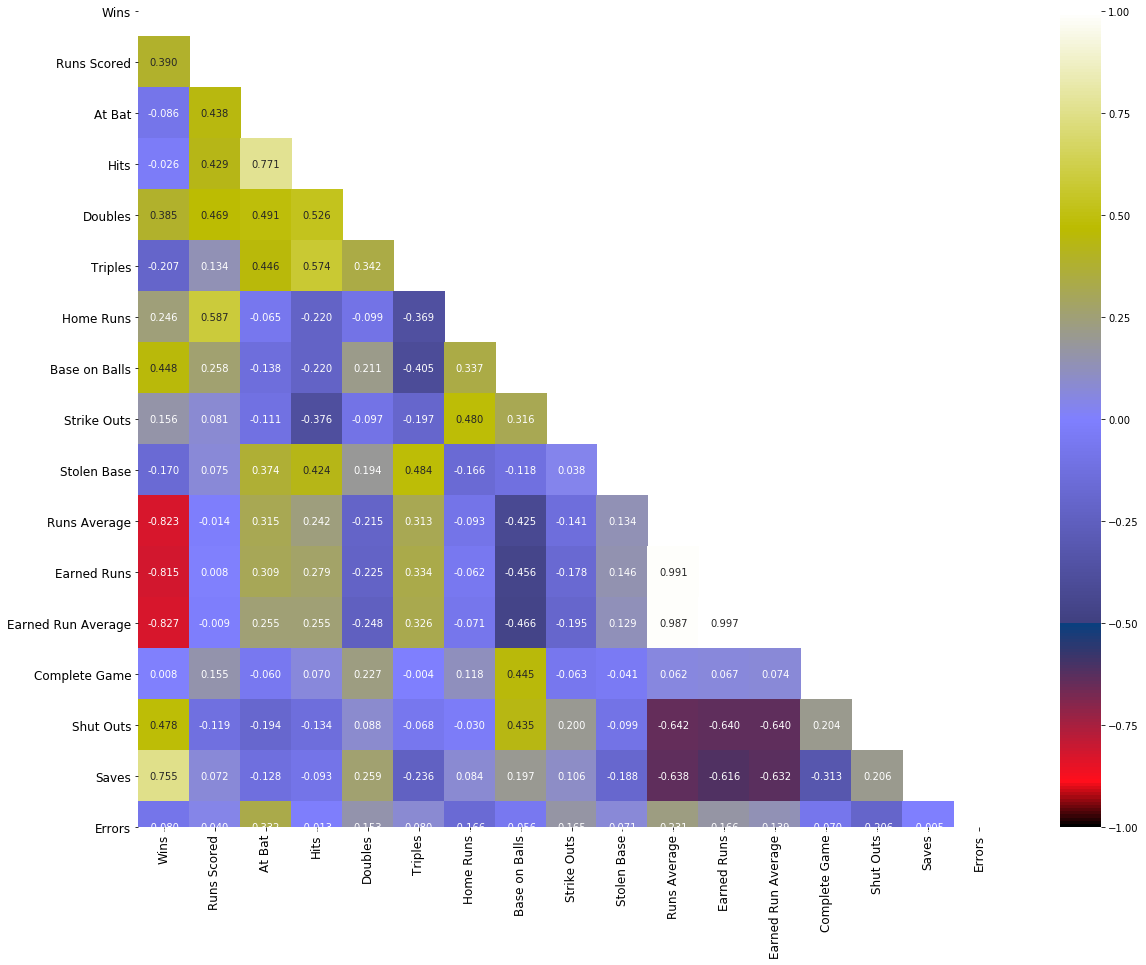

In [59]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

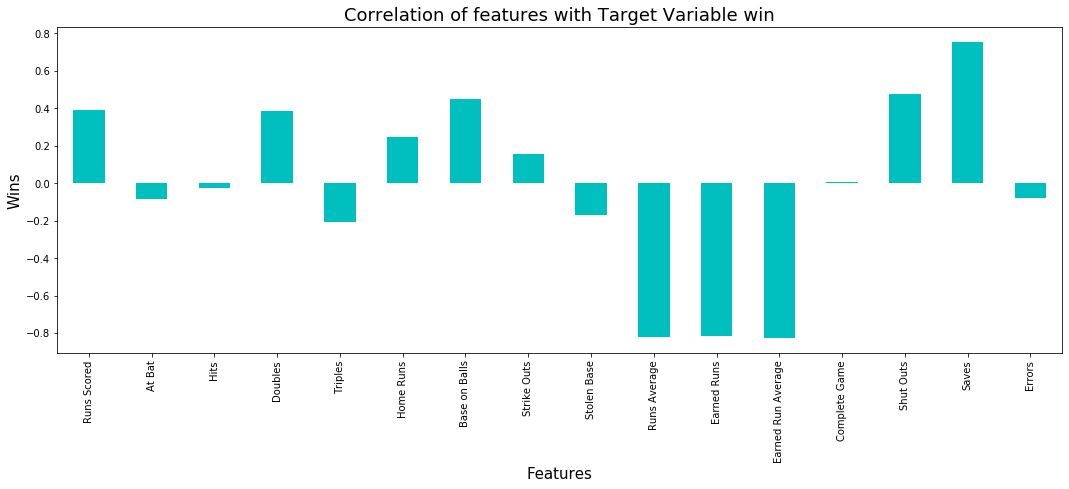

In [60]:
plt.figure(figsize = (18,6))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with Target Variable win',fontsize = 18)
plt.show()

# Observation :
    
* Hits, At bats, Complete game and errors are very poorly correlated with target variable.
* Saves, ERA,RA,EA are highly correleated with target variable.
*  here is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average". This need to check.

This multicollinearity need to check it with varaiance inflation factor or need to address by use of PCA.

# 3. Checking Multicollinearity between features using variance_inflation_factor

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df2.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

NameError: name 'df2' is not defined

# Standard Scaling

In [65]:
X=df1.drop(columns =['Wins'])
Y=df1['Wins']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# PCA

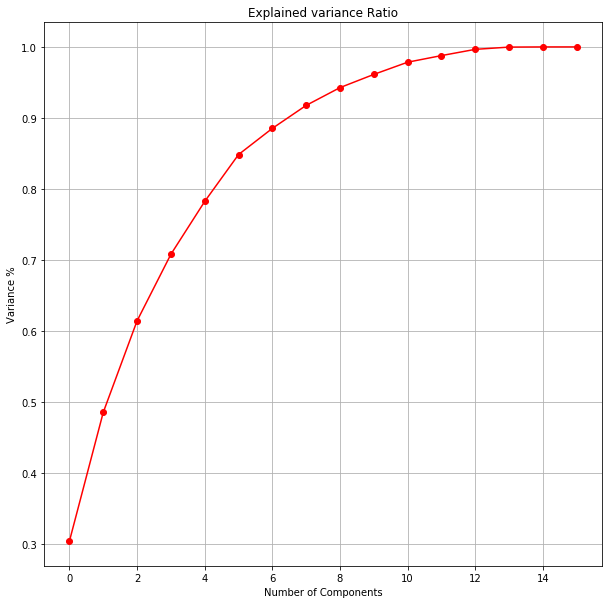

In [67]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

# Observation:
    
* AS per the graph, we can see that 7 principal components attribute for 95% of variation in the data.
* We shall pick the first 7 components for our prediction

In [69]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)

In [70]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

# Checking Multicollinearity after applying PCA

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6


We can see that Multicollinearity issue is clear now.

# Machine Learning Model Building

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20, 7)
Training target vector size: (20,)
Test feature matrix size: (9, 7)
Test target vector size: (9,)


# Finding Best Random state

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9179738330851036 on Random_state 217


# Linear Regression : Base model

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [84.58605088 96.26198656 82.50274504 63.77883574 88.03714446 70.54986049
 82.43803368 72.96772225]


Actual Wins:
 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


# Linear Regression Evaluation Matrix

In [77]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2.5623356267648214
Mean squared error : 8.560199512884266
Root Mean Squared Error: 2.925781863516873


 R2 Score :
0.9179738330851036


# Cross validation

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:

# Cross Validation
score = cross_val_score(lin_reg, principle_x, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.33546550287090265


# Finding best n_neighbors for KNN Regressor

In [82]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.246211251235321
RMSE value for k=  2 is: 6.267475568360838
RMSE value for k=  3 is: 6.1553951042064625
RMSE value for k=  4 is: 5.050525962709231
RMSE value for k=  5 is: 5.566866263886713
RMSE value for k=  6 is: 5.9956581512513445
RMSE value for k=  7 is: 5.569367750728727
RMSE value for k=  8 is: 5.896900668995536
RMSE value for k=  9 is: 6.370868305259728
RMSE value for k=  10 is: 6.42008566921034


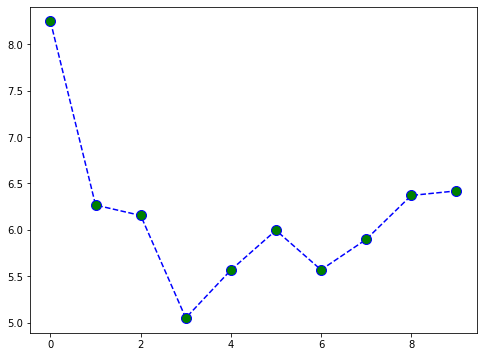

In [83]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

# Observation
-
At k= 4, we get the minimum RMSE value which approximately 5.050525962709231, and shoots up on further increasing the k value. We can safely say that k=4 will give us the best result in this case

# Applying other Regression Model, Evaluation & Crossvalidation

In [84]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 4.877094047619048
Mean squared error : 36.73567279660997
Root Mean Squared Error: 6.060996023477492


 R2 Score :
0.6479887619429499


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.17975805260022887


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 2.5162689682579664
Mean squared error : 8.44861521848299
Root Mean Squared Error: 2.9066501713283266


 R2 Score :
0.9190430642337308


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :

Mean CV Score : 0.6710873546839929


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 2.571235055189419
Mean squared error : 8.554305404400715
Root Mean Squared Error: 2.9247744194041214


 R2 Score :
0.9180303120404782


Cross Validation Score : Ridge(alpha=0.01, normalize=True) :

Mean CV Score : 0.6706084407569657


 Error of 

we can see that Lasso Regression gives maximum R2 score of 91.90%. So we will apply Hyperparameter tuning on Lasso Regression



 True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


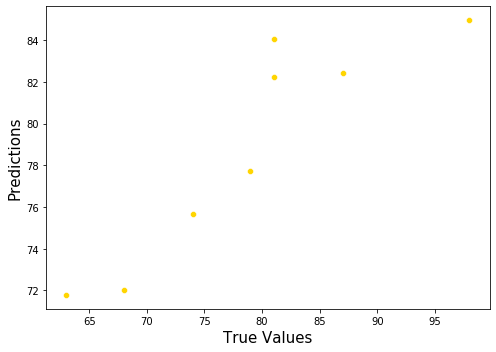





 True Values Vs Predicted Value plot Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :


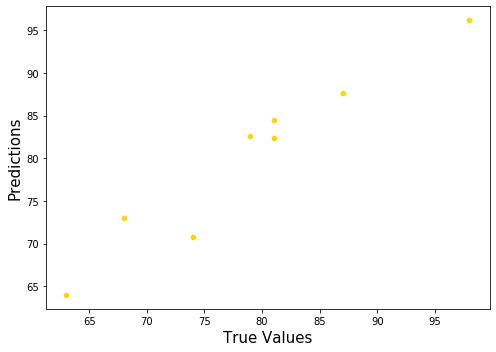





 True Values Vs Predicted Value plot Ridge(alpha=0.01, normalize=True) :


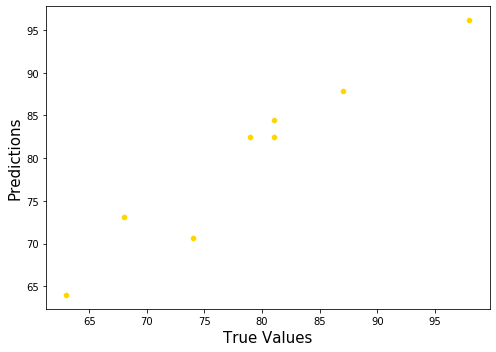





 True Values Vs Predicted Value plot SVR(epsilon=0.2, gamma='auto', kernel='poly') :


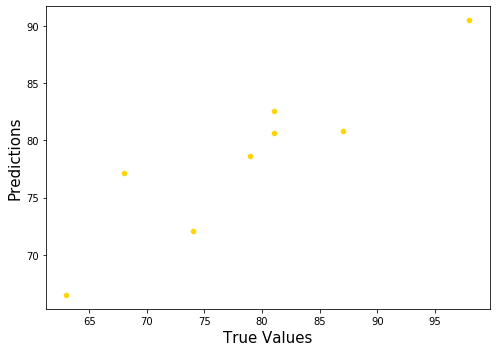





 True Values Vs Predicted Value plot DecisionTreeRegressor(criterion='mse') :


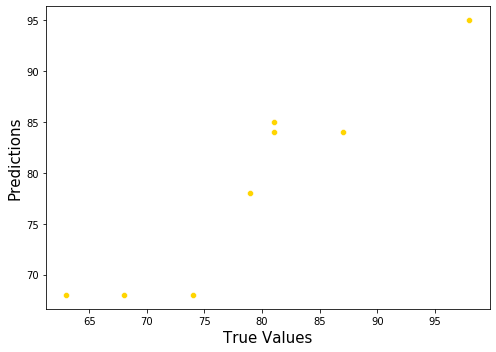





 True Values Vs Predicted Value plot AdaBoostRegressor(learning_rate=0.1) :


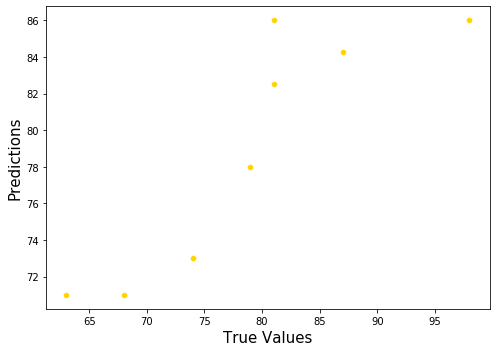





 True Values Vs Predicted Value plot GradientBoostingRegressor(max_depth=6) :


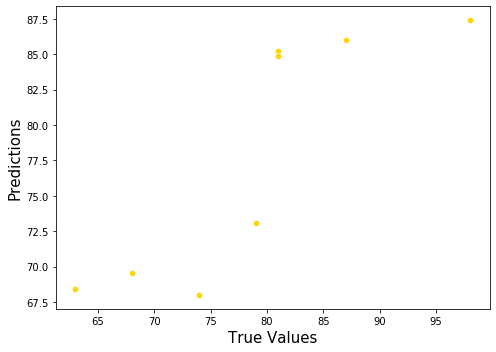





 True Values Vs Predicted Value plot KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4) :


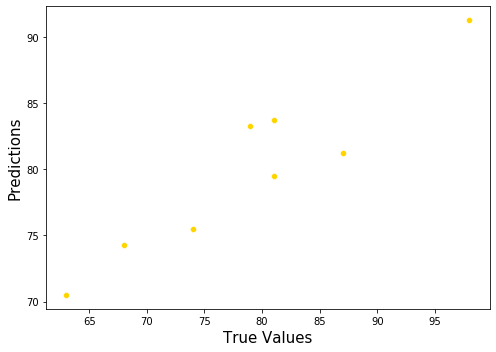





 True Values Vs Predicted Value plot XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) :


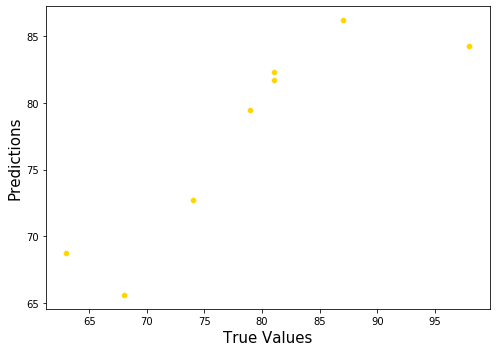

In [85]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

# Hyper Parameter Tuning : GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],'normalize':[True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}

In [88]:
GCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [90]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 19200 candidates, totalling 96000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

# Final Model

In [ ]:
Final_mod = Lasso(alpha = 0.5, fit_intercept= True, normalize = False,
                                           max_iter = 250, random_state = 32,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')

In [ ]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Saving model

In [ ]:
import joblib
joblib.dump(Final_mod,'Baseballn_Final.pkl')